In [22]:
import os
import pandas as pd

def process_csv_files(input_folder, output_folder):
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)
    
    # Iterate over all CSV files in the input folder
    for file_name in os.listdir(input_folder):
        if file_name.endswith('.xlsx'):  # Check if the file is a CSV
            file_path = os.path.join(input_folder, file_name)
            
            try:
                # Read the CSV file
                df = pd.read_csv(file_path)
                
                # Check if the required columns exist
                if "Sensor S Signal" in df.columns and "Sensor R2 Signal" in df.columns:
                    # Create a new dataframe with the required columns
                    result_df = df[["Sensor S Signal", "Sensor R2 Signal"]].copy()
                    
                    # Calculate the ratio and add it as a new column
                    result_df["Ratio"] = result_df["Sensor S Signal"] / result_df["Sensor R2 Signal"]
                    
                    # Save the processed file to the output folder
                    output_file_path = os.path.join(output_folder, file_name)
                    result_df.to_csv(output_file_path, index=False)
                    print(f"Processed and saved: {output_file_path}")
                else:
                    print(f"Skipping file {file_name}: Required columns not found.")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

# Input and output folder paths
input_folder = r"C:\Users\thaim\Downloads\א-ספרית 50 מטר"  # Replace with your input folder path
output_folder = os.path.join(input_folder, "Processed_Files")

# Run the function
process_csv_files(input_folder, output_folder)


Error processing file A.xlsx: 'utf-8' codec can't decode byte 0xc1 in position 16: invalid start byte
Error processing file B.xlsx: 'utf-8' codec can't decode byte 0xc1 in position 16: invalid start byte
Error processing file C.xlsx: 'utf-8' codec can't decode byte 0xc1 in position 16: invalid start byte
Error processing file D.xlsx: 'utf-8' codec can't decode byte 0xc1 in position 16: invalid start byte
Error processing file E.xlsx: 'utf-8' codec can't decode byte 0xc1 in position 16: invalid start byte
Error processing file F.xlsx: 'utf-8' codec can't decode byte 0xc1 in position 16: invalid start byte
Error processing file G.xlsx: 'utf-8' codec can't decode byte 0xc1 in position 16: invalid start byte
Error processing file H.xlsx: 'utf-8' codec can't decode byte 0xc1 in position 16: invalid start byte
Error processing file I.xlsx: 'utf-8' codec can't decode byte 0xc1 in position 16: invalid start byte
Error processing file ~$A.xlsx: [Errno 13] Permission denied: 'C:\\Users\\thaim\\D

In [1]:
import os
import pandas as pd

def process_excel_files(input_folder, output_folder):
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)
    
    # Iterate over all Excel files in the input folder
    for file_name in os.listdir(input_folder):
        if file_name.endswith('.xlsx'):  # Check if the file is an Excel file
            file_path = os.path.join(input_folder, file_name)
            
            try:
                # Read the Excel file
                df = pd.read_excel(file_path)
                
                # Check if the required columns exist
                if "Sensor S Signal" in df.columns and "Sensor R2 Signal" in df.columns:
                    # Create a new dataframe with the required columns
                    result_df = df[["Sensor S Signal", "Sensor R2 Signal"]].copy()
                    
                    # Calculate the ratio and add it as a new column
                    result_df["Ratio"] = result_df["Sensor S Signal"] / result_df["Sensor R2 Signal"]
                    
                    # Save the processed file to the output folder
                    output_file_name = file_name.replace('.xlsx', '_processed.csv')
                    output_file_path = os.path.join(output_folder, output_file_name)
                    result_df.to_csv(output_file_path, index=False)
                    print(f"Processed and saved: {output_file_path}")
                else:
                    print(f"Skipping file {file_name}: Required columns not found.")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

# Input and output folder paths
input_folder = r"C:\Users\thaim\Downloads\א-ספרית 50 מטר"  # Replace with your input folder path
output_folder = os.path.join(input_folder, "Processed_Files")

# Run the function
process_excel_files(input_folder, output_folder)


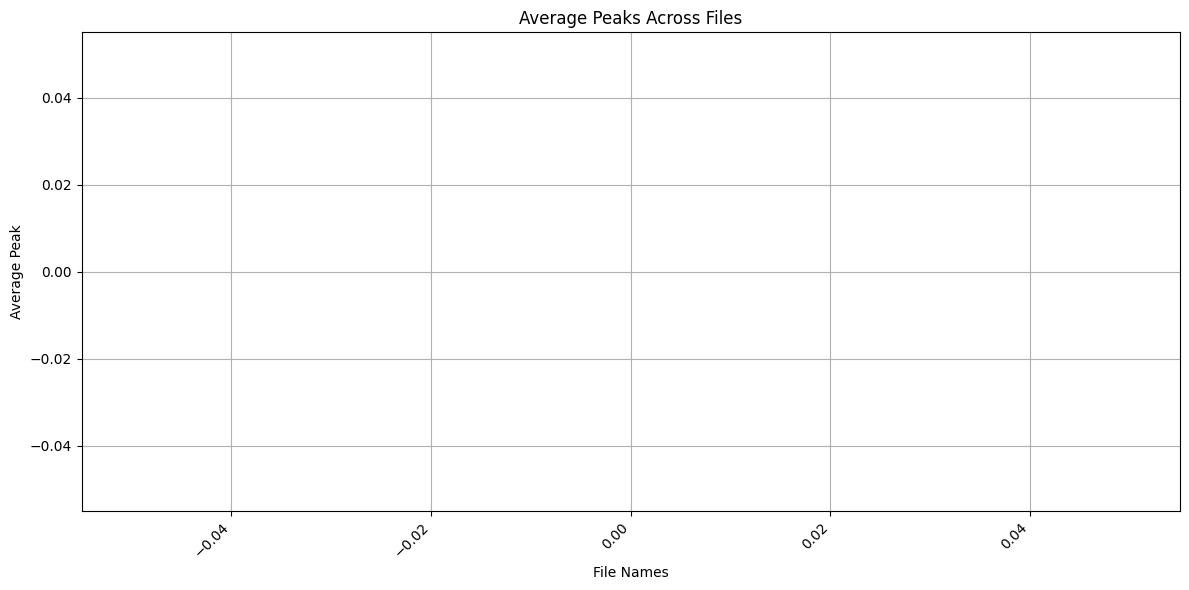

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_csv_files(input_folder, output_folder):
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    averages = []  # List to store the averages of all files
    file_names = []  # List to store file names for x-axis labels

    # Iterate over all CSV files in the input folder
    for file_name in os.listdir(input_folder):
        if file_name.endswith('.csv'):  # Check if the file is a CSV
            file_path = os.path.join(input_folder, file_name)

            try:
                # Read the CSV file
                df = pd.read_csv(file_path)

                # Check if the required column exists
                if "Sensor R2 Signal" in df.columns:
                    # Extract the "Sensor R2 Signal" column
                    sensor_r2_signal = df["Sensor R2 Signal"]

                    # Find peaks in intervals of 500 samples
                    peaks = [
                        max(sensor_r2_signal[i:i+500])
                        for i in range(0, len(sensor_r2_signal), 500)
                    ]

                    # Calculate the average of all peaks
                    average_peak = np.mean(peaks)
                    averages.append(average_peak)
                    file_names.append(file_name)  # Add file name for x-axis label

                    # Create a new dataframe for the output file
                    result_df = pd.DataFrame({
                        "Sensor R2 Signal Peaks": peaks,
                        "Average Peak": [average_peak] + [None] * (len(peaks) - 1)
                    })

                    # Save the processed file to the output folder
                    output_file_path = os.path.join(output_folder, file_name)
                    result_df.to_csv(output_file_path, index=False)
                    print(f"Processed and saved: {output_file_path}")
                else:
                    print(f"Skipping file {file_name}: Required column not found.")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

    # Plot the averages as a graph
    plt.figure(figsize=(12, 6))
    plt.plot(file_names, averages, marker='o', linestyle='-', color='b')
    plt.title("Average Peaks Across Files")
    plt.xlabel("File Names")
    plt.ylabel("Average Peak")
    plt.xticks(rotation=45, ha='right')  # Rotate file names for better readability
    plt.tight_layout()
    plt.grid()
    plt.show()

# Input and output folder paths
input_folder = r"C:\Users\thaim\Downloads\AGC (275)\254"  # Replace with your input folder path
output_folder = os.path.join(input_folder, "Processed_Files")

# Run the function
process_csv_files(input_folder, output_folder)


In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_csv_files(input_folder, output_folder):
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    averages = []  # List to store the averages of all files
    file_names = []  # List to store file names for the summary CSV

    # Iterate over all CSV files in the input folder
    for file_name in os.listdir(input_folder):
        if file_name.endswith('.csv'):  # Check if the file is a CSV
            file_path = os.path.join(input_folder, file_name)

            try:
                # Read the CSV file
                df = pd.read_csv(file_path)

                # Check if the required column exists
                if "Sensor R2 Signal" in df.columns:
                    # Extract the "Sensor R2 Signal" column
                    sensor_r2_signal = df["Sensor R2 Signal"]

                    # Find peaks in intervals of 500 samples
                    peaks = [
                        max(sensor_r2_signal[i:i+500])
                        for i in range(0, len(sensor_r2_signal), 500)
                    ]

                    # Calculate the average of all peaks
                    average_peak = np.mean(peaks)
                    averages.append(average_peak)
                    file_names.append(file_name)  # Add file name for the summary

                    # Plot the graph for the current file
                    plt.figure(figsize=(10, 5))
                    plt.plot(peaks, marker='o', linestyle='-', color='b')
                    plt.title(f"Peaks for {file_name}")
                    plt.xlabel("Interval")
                    plt.ylabel("Peak Value")
                    plt.grid()
                    plt.tight_layout()

                    # Save the graph to the output folder
                    graph_file_path = os.path.join(output_folder, f"{os.path.splitext(file_name)[0]}_graph.png")
                    plt.savefig(graph_file_path)
                    plt.close()
                    print(f"Graph saved: {graph_file_path}")
                else:
                    print(f"Skipping file {file_name}: Required column not found.")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

    # Save the averages to a CSV file
    summary_df = pd.DataFrame({
        "File Name": file_names,
        "Average Peak": averages
    })
    summary_csv_path = os.path.join(output_folder, "Summary_Averages.csv")
    summary_df.to_csv(summary_csv_path, index=False)
    print(f"Summary CSV saved: {summary_csv_path}")

    # Plot the summary graph for all files
    plt.figure(figsize=(12, 6))
    plt.plot(file_names, averages, marker='o', linestyle='-', color='b')
    plt.title("Average Peaks Across Files")
    plt.xlabel("File Names")
    plt.ylabel("Average Peak")
    plt.xticks(rotation=45, ha='right')  # Rotate file names for better readability
    plt.grid()
    plt.tight_layout()

    # Save the summary graph
    summary_graph_path = os.path.join(output_folder, "Summary_Graph.png")   
    plt.savefig(summary_graph_path)
    plt.close()
    print(f"Summary graph saved: {summary_graph_path}")

# Input and output folder paths
input_folder = r"C:\Users\thaim\Downloads\א-ספרית 50 מטר"  # Replace with your input folder path
output_folder = os.path.join(input_folder, "Processed_Files")

# Run the function
process_csv_files(input_folder, output_folder)


Summary CSV saved: C:\Users\thaim\Downloads\א-ספרית 50 מטר\Processed_Files\Summary_Averages.csv
Summary graph saved: C:\Users\thaim\Downloads\א-ספרית 50 מטר\Processed_Files\Summary_Graph.png
